In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
df = pd.read_csv('/content/h1n1_vaccine_prediction.csv')
df.head() # First 5 rows

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [3]:
# Complete information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [4]:
df1 = df.drop('unique_id', axis=1)
df1.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [16]:
# Checking for null values
df1.isnull().sum()

,0
h1n1_worry,92
h1n1_awareness,116
antiviral_medication,71
contact_avoidance,208
bought_face_mask,19
wash_hands_frequently,42
avoid_large_gatherings,87
reduced_outside_home_cont,82
avoid_touch_face,128
dr_recc_h1n1_vacc,2160


In [9]:
# Handling missing values
from sklearn.impute import SimpleImputer
imputer_object = SimpleImputer(strategy='most_frequent')
imputer_number = SimpleImputer(strategy='mean')

In [10]:
df_numerical = df1.select_dtypes('number')
df_categorical = df1.select_dtypes('object')

In [12]:
temp_object = imputer_object.fit_transform(df_categorical)
temp_number = imputer_number.fit_transform(df_numerical)

In [13]:
df1_numerical = pd.DataFrame(temp_number, columns=df_numerical.columns)
df1_categorical = pd.DataFrame(temp_object, columns=df_categorical.columns)

In [14]:
df2 = pd.concat([df1_numerical,df1_categorical],axis=1)
df2.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,h1n1_vaccine,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,...,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,...,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,...,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


In [15]:
df2.isnull().sum()

,0
h1n1_worry,0
h1n1_awareness,0
antiviral_medication,0
contact_avoidance,0
bought_face_mask,0
wash_hands_frequently,0
avoid_large_gatherings,0
reduced_outside_home_cont,0
avoid_touch_face,0
dr_recc_h1n1_vacc,0


In [17]:
df2.shape

(26707, 33)

In [19]:
# Encoding the categorical values to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df2_categorical = df2.select_dtypes('object')
df2_numerical = df2.select_dtypes('number')

In [22]:
for i in df2_categorical.columns:
  df2_categorical[i] = le.fit_transform(df2_categorical[i])

In [41]:
df3 = pd.concat([df2_numerical,df2_categorical], axis=1)
df3.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,h1n1_vaccine,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,...,0.0,3,1,3,0,2,1,0,1,2
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,...,0.0,1,0,3,1,2,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,...,0.0,0,2,3,1,0,1,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,0.0,4,0,3,0,2,1,1,1,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,0.0,2,3,3,0,0,0,0,0,0


In [42]:
df3['h1n1_vaccine'].value_counts()

,count
h1n1_vaccine,
0.0,21033
1.0,5674


<Axes: >

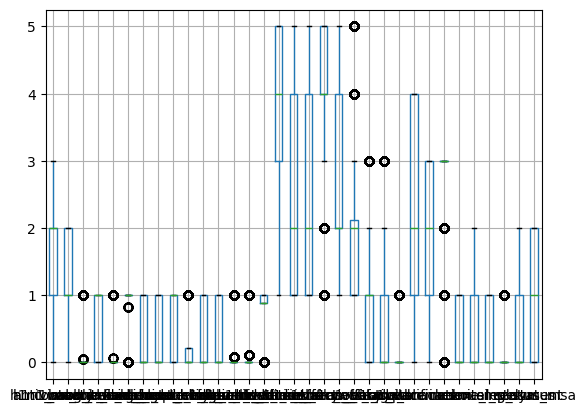

In [43]:
df3.boxplot()

In [44]:
# Outliers treatment
def outlier_treatment(data):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5*IQR)
  upper_bound = Q3 + (1.5*IQR)

  data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
  data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

  return data

In [45]:
df4 = df3.drop('h1n1_vaccine',axis=1)

In [46]:
for column in df4.columns:
  df4 = outlier_treatment(df4)

In [47]:
df5 = df4.join(df3['h1n1_vaccine'])

In [50]:
df5['h1n1_vaccine'].value_counts()

,count
h1n1_vaccine,
0.0,21033
1.0,5674


<Axes: >

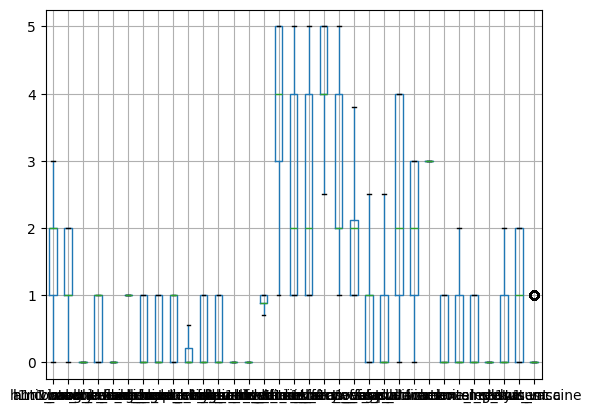

In [48]:
df5.boxplot()

In [51]:
# Model Training

X, Y = df5.drop('h1n1_vaccine', axis=1), df5['h1n1_vaccine']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=500)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [52]:
model = lr.fit(x_train, y_train)

In [53]:
pred = model.predict(x_test)

In [54]:
accuracy_score(y_test, pred)

0.8435043055035567

In [55]:
confusion_matrix(y_test, pred)

array([[4020,  210],
       [ 626,  486]])

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      4230
         1.0       0.70      0.44      0.54      1112

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342



In [58]:
# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5)

cross_val_score(lr,X,Y,cv=kf)

array([0.83994759, 0.84013478, 0.84553454, 0.84796855, 0.83710916])